# Exploratory Analysis and Modeling

# Exploratory analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from datetime import date

In [2]:
# get data (5 fixtures avg. performance + next fixture actual points)
last_5_df = pd.read_csv('data/5_gw_perform_upto_gw30.csv')

## Midfield Players

Let's look at correlation between the variables. First we'll filter to midfield players who averaged at least 45 minutes per game over 5 games (made 5 appearances). 

In [3]:
# filter mids who play at least 45 min. per game
mid_filter = last_5_df[(last_5_df['position'] == 'MID') &
                       (last_5_df['mean_minutes'] >= 45)]
mid_filter

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
0,0,Granit Xhaka,3,Arsenal,MID,4.8,89.4,0.2,0.4,0.4,...,24.90,11.2,5.98,0.094,0.076,0.170,0.642,1076.0,1100.0,2
1,0,Granit Xhaka,3,Arsenal,MID,4.8,89.4,0.2,0.4,0.2,...,24.88,20.0,6.82,0.126,0.090,0.216,0.710,1082.0,1121.0,5
2,0,Granit Xhaka,3,Arsenal,MID,3.4,89.4,0.0,0.4,0.4,...,27.02,15.0,5.94,0.058,0.120,0.178,0.724,1080.0,1123.0,9
3,0,Granit Xhaka,3,Arsenal,MID,4.0,90.0,0.2,0.2,0.2,...,24.26,20.0,6.36,0.124,0.132,0.256,0.986,1118.0,1159.0,2
4,0,Granit Xhaka,3,Arsenal,MID,4.0,90.0,0.2,0.2,0.2,...,20.72,21.2,6.30,0.122,0.168,0.290,1.046,1155.0,1191.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,Pablo Sarabia,704,Wolves,MID,3.0,71.8,0.2,0.0,0.0,...,22.16,17.4,5.26,0.208,0.118,0.326,1.100,1168.0,1184.0,0
7022,0,Pablo Sarabia,704,Wolves,MID,2.8,71.8,0.2,0.0,0.0,...,24.14,17.0,5.48,0.298,0.128,0.426,0.906,1136.0,1164.0,3
7023,0,Pablo Sarabia,704,Wolves,MID,3.2,73.2,0.2,0.0,0.2,...,24.80,16.2,5.52,0.270,0.114,0.384,0.874,1128.0,1150.0,0
7024,0,Pablo Sarabia,704,Wolves,MID,2.8,55.2,0.2,0.0,0.2,...,21.62,14.8,4.96,0.264,0.112,0.376,0.646,1164.0,1171.0,1


In [4]:
# correlation with latest points
mid_filter.corrwith(mid_filter['latest_points']).dropna().sort_values()

id                    -0.110085
mean_opp_def          -0.061113
mean_opp_att          -0.048366
mean_xgc               0.005609
mean_goals_conceded    0.018736
mean_own_goals         0.022267
mean_clean_sheets      0.090193
mean_bonus             0.124762
mean_assists           0.145598
mean_minutes           0.158122
mean_goals_scored      0.160924
mean_bps               0.170819
mean_influence         0.171559
mean_xa                0.181171
mean_creativity        0.183006
mean_points            0.213788
mean_xg                0.214089
mean_threat            0.239475
mean_xgi               0.247858
mean_ict               0.253545
latest_points          1.000000
dtype: float64

For this data, ICT and xgi seem to have the highest correlation with latest points. However, the correlation bewtween all variables and latest points is low.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

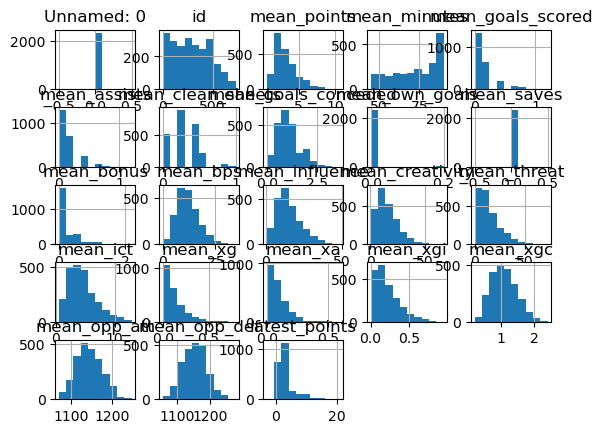

In [5]:
mid_filter.hist()

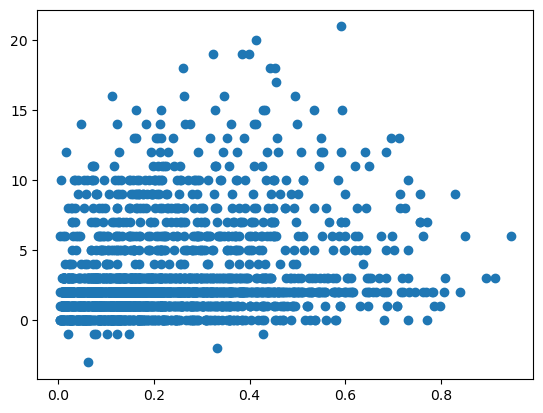

In [6]:
plt.scatter('mean_xgi', 'latest_points', data = mid_filter)

## Forward Players

Let's look at correlation between the variables. First we'll filter to forwards who averaged at least 45 minutes per game over 5 games (made 5 appearances). 

In [7]:
# filter fwds who play at least 45 min. per game
fwd_filter = last_5_df[(last_5_df['position'] == 'FWD') &
                       (last_5_df['mean_points'] >= 1)]
fwd_filter.head()

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
12755,0,Eddie Nketiah,11,Arsenal,FWD,1.0,12.0,0.0,0.0,0.0,...,4.56,20.0,2.76,0.106,0.012,0.118,0.126,1076.0,1100.0,1
12756,0,Eddie Nketiah,11,Arsenal,FWD,1.0,13.8,0.0,0.0,0.0,...,2.50,20.4,2.58,0.106,0.004,0.110,0.186,1082.0,1121.0,1
12757,0,Eddie Nketiah,11,Arsenal,FWD,1.0,15.0,0.0,0.0,0.0,...,2.54,17.4,2.24,0.098,0.004,0.102,0.168,1080.0,1123.0,1
12758,0,Eddie Nketiah,11,Arsenal,FWD,1.0,13.8,0.0,0.0,0.0,...,0.48,14.4,1.64,0.082,0.006,0.088,0.134,1118.0,1159.0,1
12759,0,Eddie Nketiah,11,Arsenal,FWD,1.0,8.2,0.0,0.0,0.0,...,0.40,2.2,0.26,0.010,0.004,0.014,0.092,1155.0,1191.0,1


In [8]:
# correlation with latest points
fwd_filter.corrwith(fwd_filter['latest_points']).dropna().sort_values()

id                    -0.097652
mean_opp_def          -0.062943
mean_opp_att          -0.010011
mean_assists           0.098173
mean_goals_conceded    0.144210
mean_xgc               0.163176
mean_clean_sheets      0.181252
mean_xa                0.214889
mean_creativity        0.217782
mean_bonus             0.235169
mean_minutes           0.283294
mean_xg                0.284782
mean_goals_scored      0.290421
mean_threat            0.293810
mean_bps               0.301008
mean_xgi               0.301156
mean_points            0.306628
mean_influence         0.311464
mean_ict               0.321871
latest_points          1.000000
dtype: float64

For this data, attacking stats such as ICT, influence, XGI, BPS seem to be the highest contributors towards points. This is expected since forwards get points almost exclusively from goals and assists.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

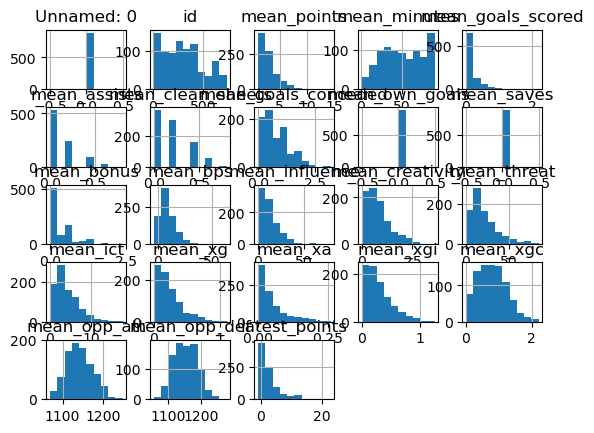

In [9]:
fwd_filter.hist()

## Defenders

Doing the same as above with defenders. For defenders we will filter to those who play at least 60 minutes per game (as required to get clean sheet points).

In [10]:
# filter def who play at least 60 min. per game
def_filter = last_5_df[(last_5_df['position'] == 'DEF') &
                       (last_5_df['mean_minutes'] >= 60)]
def_filter.head()

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
7082,0,Benjamin White,10,Arsenal,DEF,4.4,78.4,0.0,0.0,0.6,...,7.38,1.6,2.28,0.000,0.090,0.090,0.532,1076.0,1100.0,1
7083,0,Benjamin White,10,Arsenal,DEF,3.6,76.2,0.0,0.0,0.4,...,6.26,1.6,1.72,0.000,0.104,0.104,0.578,1082.0,1121.0,6
7084,0,Benjamin White,10,Arsenal,DEF,4.6,78.4,0.0,0.0,0.6,...,11.12,2.0,2.38,0.000,0.112,0.112,0.616,1080.0,1123.0,5
7085,0,Benjamin White,10,Arsenal,DEF,4.2,81.2,0.0,0.2,0.4,...,16.54,2.2,3.42,0.004,0.168,0.172,0.906,1118.0,1159.0,1
7086,0,Benjamin White,10,Arsenal,DEF,4.2,81.2,0.0,0.2,0.4,...,16.14,2.6,3.34,0.004,0.164,0.168,0.966,1155.0,1191.0,6


In [11]:
# correlation with latest points
def_filter.corrwith(def_filter['latest_points']).dropna().sort_values()

id                    -0.053053
mean_xgc              -0.044162
mean_goals_conceded   -0.027583
mean_own_goals        -0.025544
mean_goals_scored     -0.011049
mean_opp_att          -0.009229
mean_xg                0.005181
mean_threat            0.005444
mean_opp_def           0.040399
mean_influence         0.058177
mean_minutes           0.058300
mean_clean_sheets      0.067463
mean_xgi               0.081156
mean_assists           0.087956
mean_bonus             0.090356
mean_ict               0.094017
mean_points            0.095513
mean_xa                0.099384
mean_creativity        0.101184
mean_bps               0.125541
latest_points          1.000000
dtype: float64

For defenders, there is no stat that seems to be a strong predictor of future performance. It could be that defender performance is tied more closely to overall team performance compared to other positions. Only two players score points from goals (scorer + assister), but conceding goals is a team effort. 

# Predicting next fixture points using regression
Trying linear regression for better speed vs. KNN regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import numpy as np

In [13]:
#import data
data = pd.read_csv("data/last_5_gw14-19.csv")

## Midfield Players

In [14]:
#filter midfielders
mid_data = data[(data['position'] == 'MID') &
                    (data['mean_minutes'] >= 45)]

# split the data for training and testing using 60:40 split
mid_train, mid_test = train_test_split(
    mid_data, train_size=0.6, random_state=1234
)

we will use all predictors for midfield players

In [15]:
mid_model = linear_model.LinearRegression()

X_train = mid_train[['mean_ict', 'mean_xgi']]
y_train = mid_train[["latest_points"]]

# fit the linear regression model
mid_model.fit(X_train, y_train)

LinearRegression()

In [16]:
X_test = mid_test[['mean_ict', 'mean_xgi']]
y_test = mid_test[["latest_points"]]

# predict on test data
mid_preds = mid_test
mid_preds = mid_preds.assign(predicted=mid_model.predict(X_test))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=mid_preds["latest_points"], y_pred=mid_preds["predicted"])
)

RMSPE


2.801648977205933

Since RMSPE is in units of the response variable "latest_points", the prediction appears to be accurate to within ~3 points. This is an ok prediction, considering the variability associated with football player performance. As midfielders get most of their FPL points from goals and assists and football is a relatively low scoring game, it is expected that it is hard to accurately predict whether any individual player will score points.

In [17]:
# Save the model
today = date.today()
today_date = today.strftime("%Y%m%d")
mid_model_name = "mid_model_" + today_date + ".pkl"  

with open(mid_model_name, 'wb') as file:  
    pickle.dump(mid_model, file)

## Forward Players

In [18]:
#filter forwards
fwd_data = data[(data['position'] == 'FWD') &
                    (data['mean_minutes'] >= 45)]

# split the data for training and testing using 60:40 split
fwd_train, fwd_test = train_test_split(
    fwd_data, train_size=0.6, random_state=1234
)

In [19]:
lm = linear_model.LinearRegression()
X_train_fwd = fwd_train[["mean_bps", "mean_xgi", "mean_points", 
                         "mean_influence", "mean_ict"]]
y_train_fwd = fwd_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train_fwd, y_train_fwd)

LinearRegression()

In [20]:
X_test_fwd = fwd_test[["mean_bps", "mean_xgi", "mean_points", 
                         "mean_influence", "mean_ict"]]
y_test_fwd = fwd_test[["latest_points"]]

# predict on test data
fwd_preds = fwd_test
fwd_preds = fwd_preds.assign(predicted=lm.predict(X_test_fwd))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=fwd_preds["latest_points"], y_pred=fwd_preds["predicted"])
)

RMSPE

7.343329155848989

In [21]:
# show the highest predicted points
fwd_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
539,0,Kieffer Moore,62,Bournemouth,FWD,5.0,84.0,0.6,0.0,0.2,...,24.6,5.48,0.41456,0.027858,0.442418,1.61450,1148.0,1152.0,1,11.758479
588,0,Chris Wood,354,Newcastle,FWD,4.0,54.8,0.4,0.0,0.6,...,14.2,3.56,0.30968,0.047982,0.357662,0.42776,1120.0,1142.0,1,11.061095
540,0,Dominic Solanke,66,Bournemouth,FWD,3.2,89.6,0.2,0.2,0.2,...,29.4,4.80,0.20896,0.014356,0.223316,1.58928,1148.0,1152.0,2,7.358580
586,0,Anthony Martial,345,Man Utd,FWD,2.2,48.0,0.2,0.0,0.4,...,21.0,3.62,0.32566,0.073640,0.399300,0.38768,1102.0,1100.0,2,4.991982
599,0,Che Adams,411,Southampton,FWD,3.8,84.6,0.2,0.2,0.0,...,37.4,6.52,0.40418,0.160814,0.564994,1.16908,1162.0,1178.0,2,4.419129
542,0,Ivan Toney,80,Brentford,FWD,6.2,72.0,0.8,0.2,0.2,...,59.2,10.60,0.63414,0.058914,0.693054,0.89832,1170.0,1162.0,0,3.766397
543,0,Bryan Mbeumo,95,Brentford,FWD,2.6,74.8,0.2,0.2,0.0,...,19.0,5.76,0.28096,0.174798,0.455758,0.87362,1170.0,1162.0,12,-0.158676
533,0,Gabriel Fernando de Jesus,28,Arsenal,FWD,2.6,54.0,0.0,0.4,0.6,...,42.4,7.30,0.31360,0.150462,0.464062,0.28044,1134.0,1132.0,0,-2.981223


## Defenders

In [22]:
#filter forwards
def_data = data[(data['position'] == 'DEF') &
                (data['mean_minutes'] >= 60)]

# split the data for training and testing using 60:40 split
def_train, def_test = train_test_split(
    def_data, train_size=0.6, random_state=1234
)

In [23]:
lm = linear_model.LinearRegression()

X_train_def = def_train[["mean_xgc", "mean_opp_att",
                         "mean_goals_conceded", "mean_xgi", "mean_bps",
                        "mean_clean_sheets", "mean_points"]]
y_train_def = def_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train_def, y_train_def)

LinearRegression()

In [24]:
X_test_def = def_test[["mean_xgc", "mean_opp_att",
                         "mean_goals_conceded", "mean_xgi", "mean_bps",
                        "mean_clean_sheets", "mean_points"]]
y_test_def = def_test[["latest_points"]]

# predict on test data
def_preds = def_test
def_preds = def_preds.assign(predicted=lm.predict(X_test_def))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=def_preds["latest_points"], y_pred=def_preds["predicted"])
)

RMSPE

3.097092888910334

In [25]:
# show the highest predicted points
def_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
174,0,Fabian Schär,366,Newcastle,DEF,5.4,88.4,0.0,0.0,0.8,...,10.4,3.08,0.10032,0.045710,0.146030,0.67958,1120.0,1142.0,6,5.961830
177,0,Sven Botman,377,Newcastle,DEF,5.4,85.2,0.0,0.0,0.8,...,4.6,2.06,0.07376,0.005000,0.078760,0.67958,1120.0,1142.0,6,5.056022
155,0,Luke Shaw,332,Man Utd,DEF,5.6,84.8,0.0,0.2,0.6,...,1.4,3.18,0.00424,0.138278,0.142518,0.90068,1102.0,1100.0,15,4.907326
142,0,John Stones,302,Man City,DEF,2.8,90.0,0.0,0.0,0.2,...,12.0,3.52,0.06954,0.040236,0.109776,0.72290,1084.0,1138.0,9,3.910813
100,0,Kenny Tete,215,Fulham,DEF,3.2,72.0,0.0,0.2,0.4,...,6.4,4.14,0.04158,0.125928,0.167508,0.99162,1158.0,1190.0,0,3.898944
75,0,Joachim Andersen,165,Crystal Palace,DEF,3.2,90.0,0.0,0.0,0.4,...,5.8,2.74,0.04520,0.017506,0.062706,1.17592,1082.0,1086.0,0,3.475215
205,0,Ben Davies,432,Spurs,DEF,3.2,72.2,0.4,0.0,0.0,...,9.6,3.86,0.07364,0.058748,0.132388,0.76428,1138.0,1156.0,1,3.440613
76,0,Marc Guéhi,167,Crystal Palace,DEF,3.0,72.0,0.0,0.0,0.4,...,3.8,1.74,0.01464,0.008618,0.023258,0.65476,1082.0,1086.0,0,3.433691
29,0,Jordan Zemura,76,Bournemouth,DEF,1.8,67.8,0.0,0.0,0.2,...,3.6,2.60,0.00000,0.052364,0.052364,1.10670,1148.0,1152.0,0,3.047979
111,0,Timothy Castagne,258,Leicester,DEF,3.2,90.0,0.0,0.0,0.4,...,11.6,4.66,0.12164,0.040652,0.162292,1.53886,1208.0,1216.0,1,2.993408


## Model Considerations and Improvements

- Data analyzed from one incomplete season so far. Perhaps we can reduce noise if data is collected across the whole season or multiple season. This would involve collecting data for each gameweek and the 5 preceeding gameweeks and appending it to the data as was done in this program.
- The predictor doesn't currently consider opposition strength for the next fixture. I expect that players playing stronger teams are likely to return fewer points, especially those players who play for weaker teams. 
- This predictor attempts to analyze player form over 5 consecutive fixtures, assuming that they will maintain that form. Despite being elite athletes, football players are human and can go through periods of good and bad form. 
- Predicting points for forwards doesn't seem to be straighforward with this dataset/model. Perhaps this can be improved by collecting data over a longer time-span.